## Example 3.1 : Wave interference

### Situation
Consider two circular waves spreading outward. The centers of the waves are located at different points, (x1,y1) and (x2, y2).  

### Task
Superimpose the two waves and plot the resulting wave.

### Setup
We place the entire system within a square with side length L, with corner coordinates are ($\pm$L/2,$\pm$L/2).  
We discretize the space with spacing of delta, that is, with grid of (L/delta, L/delta) points.  
The y-coordinate of the center of each wave is at y1=y2=0.  
The centers are separated by distance d.  That is, x1=-d/2, x2=d/2.  
Both waves have the same amplitude (that is, they are identical except for their center positions).  
We ignore time-dependence and approximate the circularly propagating wave simply by sin(kr), where k is the wave number and r is the distance from the center of the wave.  
Thus, the resulting superimposed wave is sin(kr1)+sin(kr2), where r1 is the distance from (x1,y1) and r2 from (x2,y2).

### parameters:

| symbol | default values | meaning |
| ------ | ------- | -------------- |
| L | 100 | the system length |
| $\delta$ | 0.1| the spacing of space grid |
| d | 20 | the distance between centers of the waves|
| $\lambda$| 5.0 | the wavelength |

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
pi = np.pi
# set parameters 
L = 100.
delta = 0.1
d = 20
lambda_var = 5.  # for generality, maybe we should avoid cases where d is an integer multiple of lambda_var

x1 = -d/2 
x2 = d/2
y1 = y2 = 0.
k = 2*pi/lambda_var
print((k*d/2)/pi)

4.0


In [3]:
# set up grids
xx = np.arange(-L/2,L/2+delta,delta)
yy = np.arange(-L/2,L/2+delta,delta)
x, y = np.meshgrid(xx, yy)

In [4]:
# create waves
r1 = np.sqrt((x-x1)**2 + (y-y1)**2)
r2 = np.sqrt((x-x2)**2 + (y-y2)**2)
wave1 = np.sin(k*r1)
wave2 = np.sin(k*r2)
wave = wave1 + wave2
print(wave.shape)

(1001, 1001)


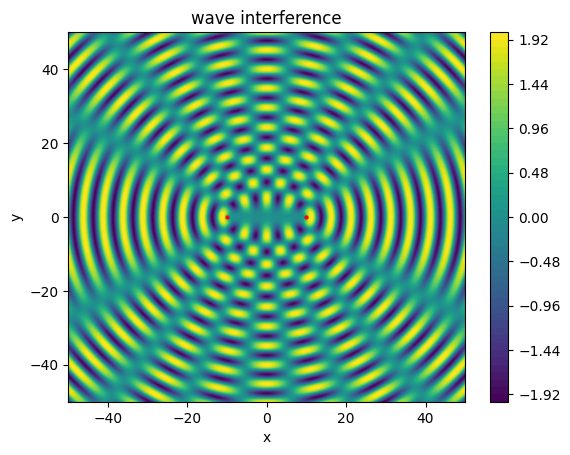

In [5]:
# show wave
plt.contourf(x, y, wave, levels=50, cmap='viridis')  # roughly speaking, levels+1 is the number of discretization of the value (here, "wave") to draw contour.  The meaning will be clear if you tune it to low value
plt.plot(x1, y1, 'ro', markersize=2)
plt.plot(x2, y2, 'ro', markersize=2)
plt.colorbar()
plt.title('wave interference')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Some Analysis:

Since $\sin(kr_1) + \sin(kr_2) = 2\sin(\frac{k}{2}(r_1+r_2))\cos(\frac{k}{2}(r_1-r_2))$, the zero points of the wave can be divided to two groups. 

### Ellipses   
$\frac{k}{2}(r_1+r_2) = n\pi$ with n an integer.  Since $r_1+r_2\geq d$, the minimum value of $n$ is $n_{\rm min} = {\rm ceil}(\frac{kd}{2\pi})$.

Generally, an ellipse with foci $x=-f$ and $x=f$ and the sum of distance $2a$ is described as $\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$ with $b^2=a^2-f^2$.  
The parametric representation is $x=a\cos(t), y=b\sin(t)$.  
In our case, $f=\frac{d}{2}$ and $a=\frac{n\pi}{k}$.

### Hyperbolas  
$\frac{k}{2}(r_1-r_2) = (n+\frac{1}{2})\pi$ with n an integer.  Since $r_1-r_2\leq d$, the maximum value of $n$ is $n_{\rm max} = {\rm floor}(\frac{kd}{2\pi}-\frac{1}{2})$.

Generally, a hyperbola with foci $x=-f$ and $x=f$ and the difference of distance $2a$ is described as $\frac{x^2}{a^2}-\frac{y^2}{b^2}=1$ with $b^2=f^2-a^2$.  
The parametric representation is $x=a\cosh(t), y=b\sinh(t)$.  
In our case, $f=\frac{d}{2}$ and $a=\frac{(n+\frac{1}{2})\pi}{k}$.

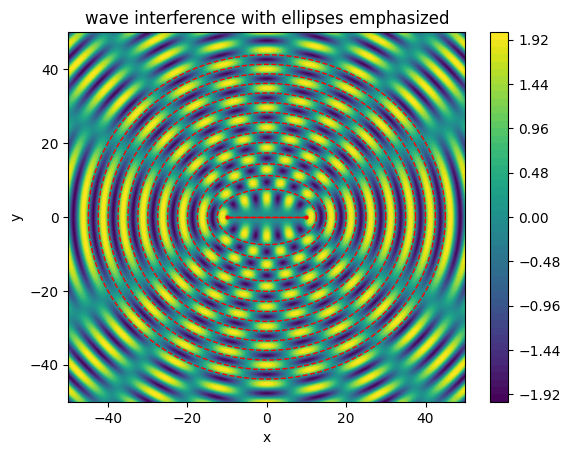

In [6]:
# show ellipses
plt.contourf(x, y, wave, levels=50, cmap='viridis') 
plt.colorbar()
plt.plot(x1, y1, 'ro', markersize=2)
plt.plot(x2, y2, 'ro', markersize=2)
n_min = math.ceil((k*d/2)/pi) 
for n in range(n_min, n_min+15):
    t = np.linspace(0, 2*np.pi, 100)
    a = n*pi/k
    b = math.sqrt(a**2 - d**2/4)
    x_e, y_e = a*np.cos(t), b*np.sin(t)
    plt.plot(x_e, y_e, 'r', lw=1, ls='--')
plt.title('wave interference with ellipses emphasized')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

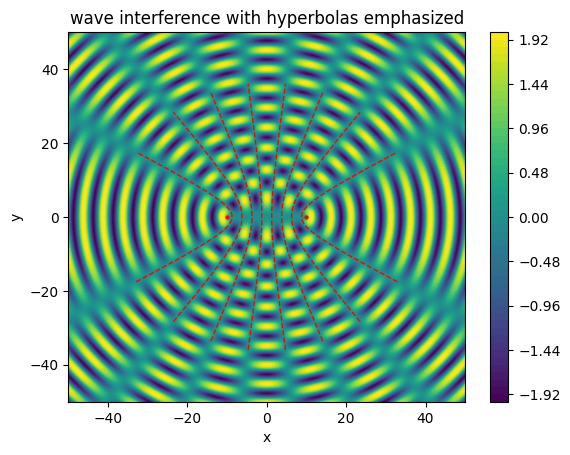

In [7]:
# show hyperbolas
plt.contourf(x, y, wave, levels=50, cmap='viridis') 
plt.colorbar()
plt.plot(x1, y1, 'ro', markersize=2)
plt.plot(x2, y2, 'ro', markersize=2)
n_max = math.floor((k*d)/(2*pi) -1/2) 
for n in range(n_max+1):
    t = np.linspace(-2, 2, 100)
    a = (n+1/2)*pi/k
    b = math.sqrt(d**2/4 - a**2)
    x_h, y_h = a*np.cosh(t), b*np.sinh(t)
    plt.plot(x_h, y_h, 'r', lw=1, ls='--')
    plt.plot(-x_h, y_h, 'r', lw=1, ls='--')
plt.title('wave interference with hyperbolas emphasized')
plt.xlabel('x')
plt.ylabel('y')
plt.show()